In [1]:
import scvelo as scv
import cellrank as cr

In [2]:
adata = scv.read("Con5.h5ad")
adata

AnnData object with n_obs × n_vars = 1542 × 36601
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_RNA', 'nFeature_RNA', 'orig.ident.1', 'nCount_RNA.1', 'nFeature_RNA.1', 'percent.ribo', 'percent.mito', 'count.mad.lower', 'count.mad.higher', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.2', 'seurat_clusters', 'cell_type', 'RNA_snn_res.1.2'
    var: 'features', 'ambiguous_features', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

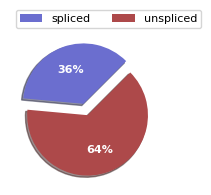

In [3]:
scv.pl.proportions(adata)


In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=20, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)

Filtered out 25636 genes that are detected 20 counts (shared).
Normalized count data: X, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
recovering dynamics (using 1/40 cores)


  0%|          | 0/151 [00:00<?, ?gene/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:697: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:700: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:32) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


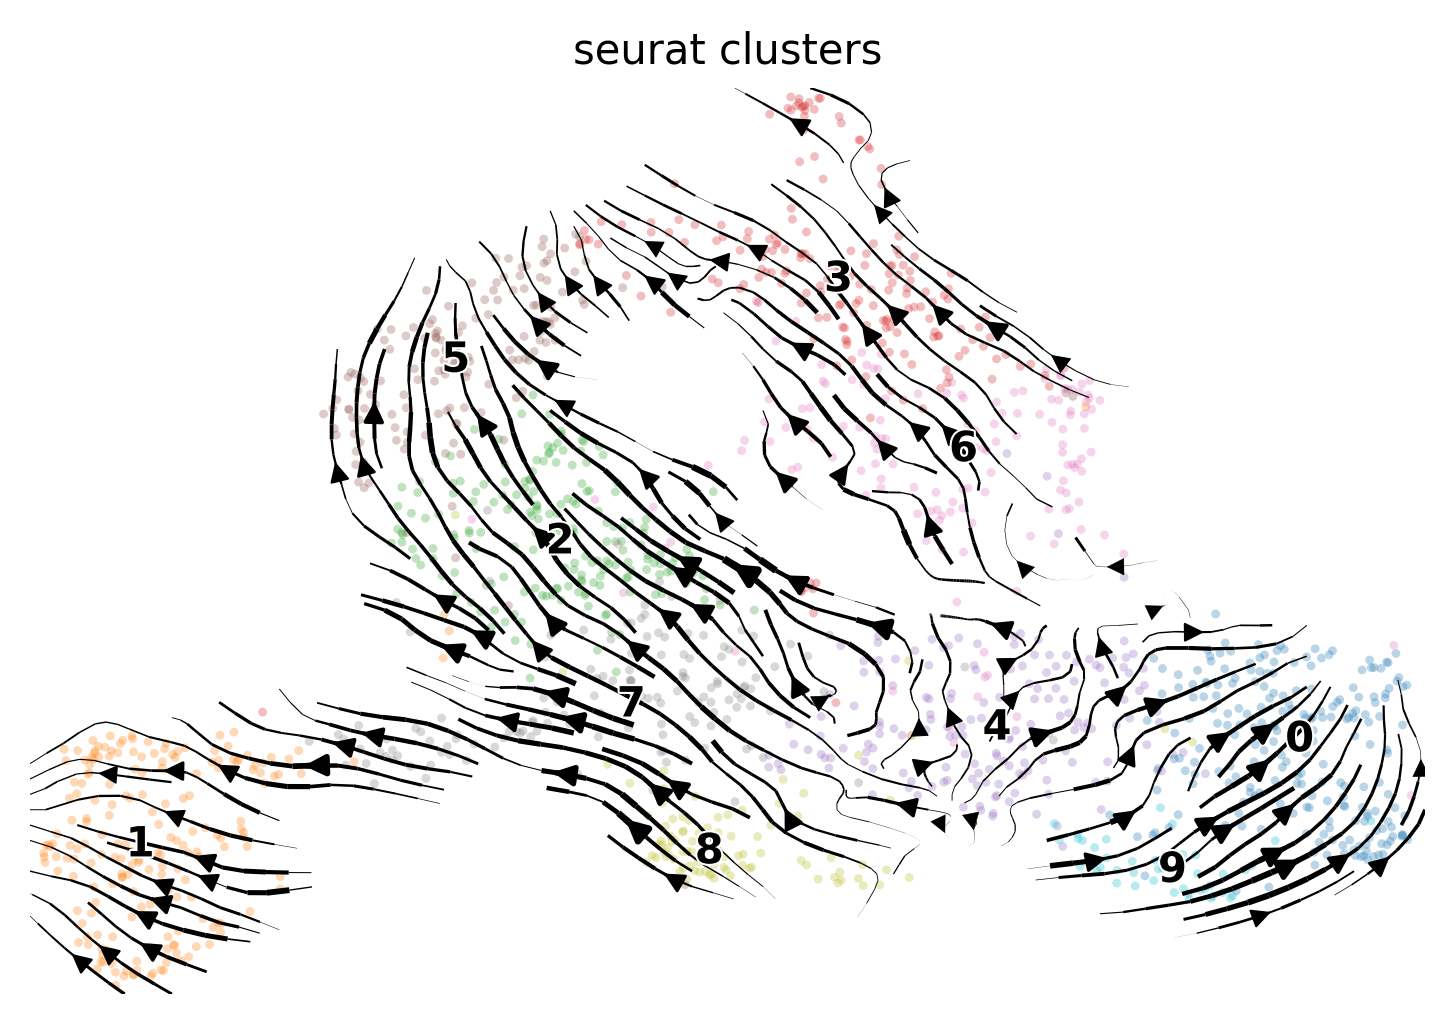

In [5]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=18, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


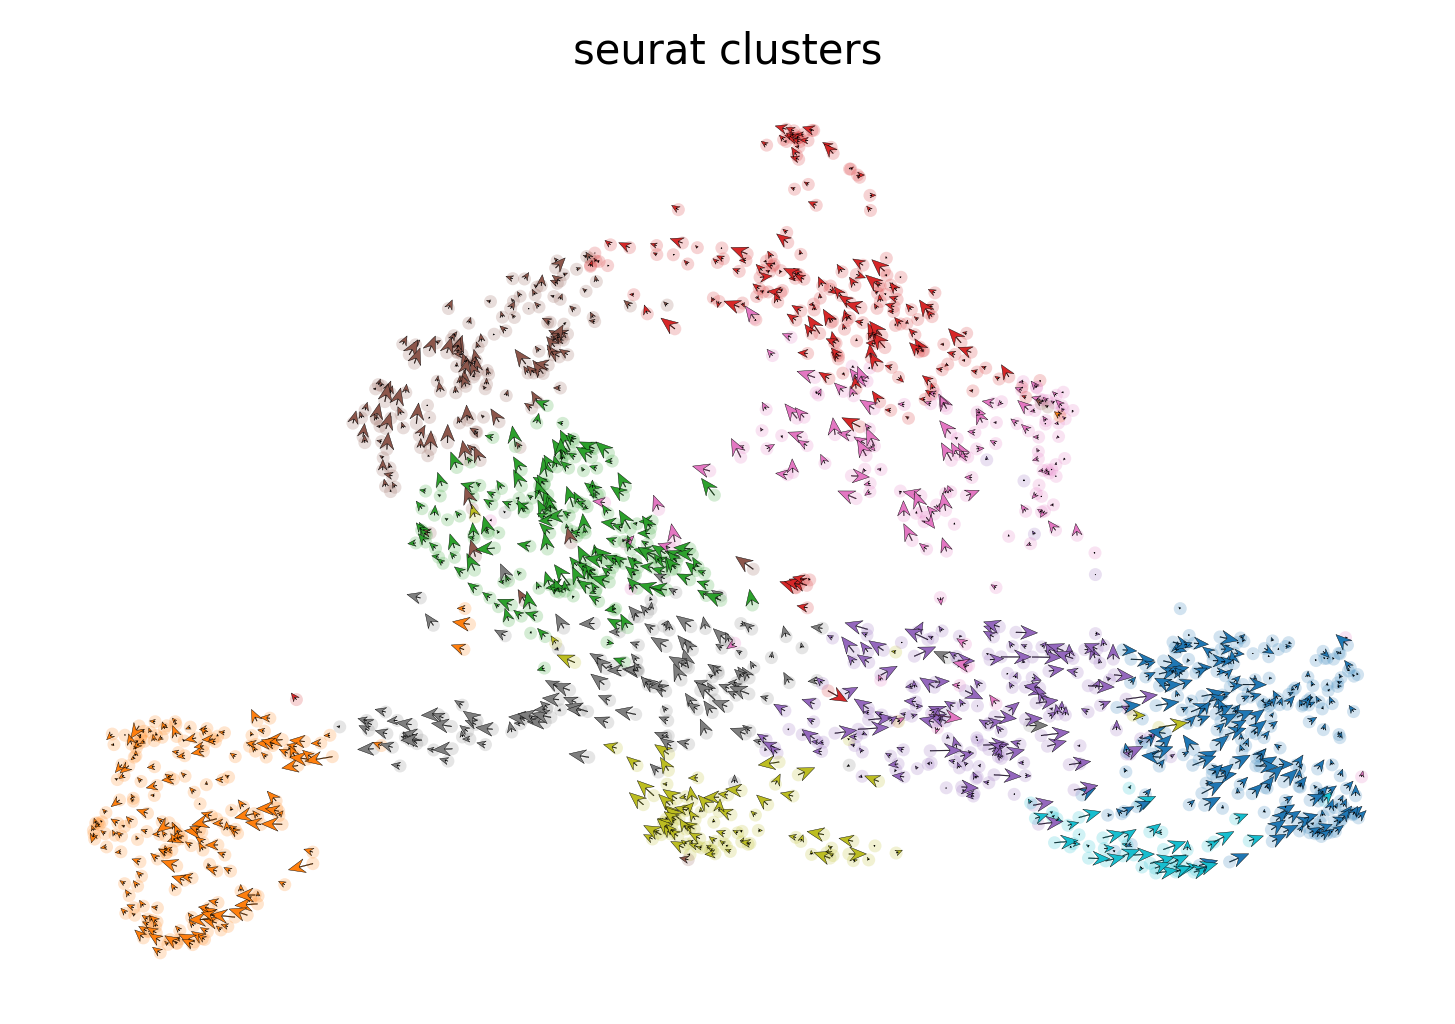

In [6]:
scv.pl.velocity_embedding(adata, basis="umap", color="seurat_clusters", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


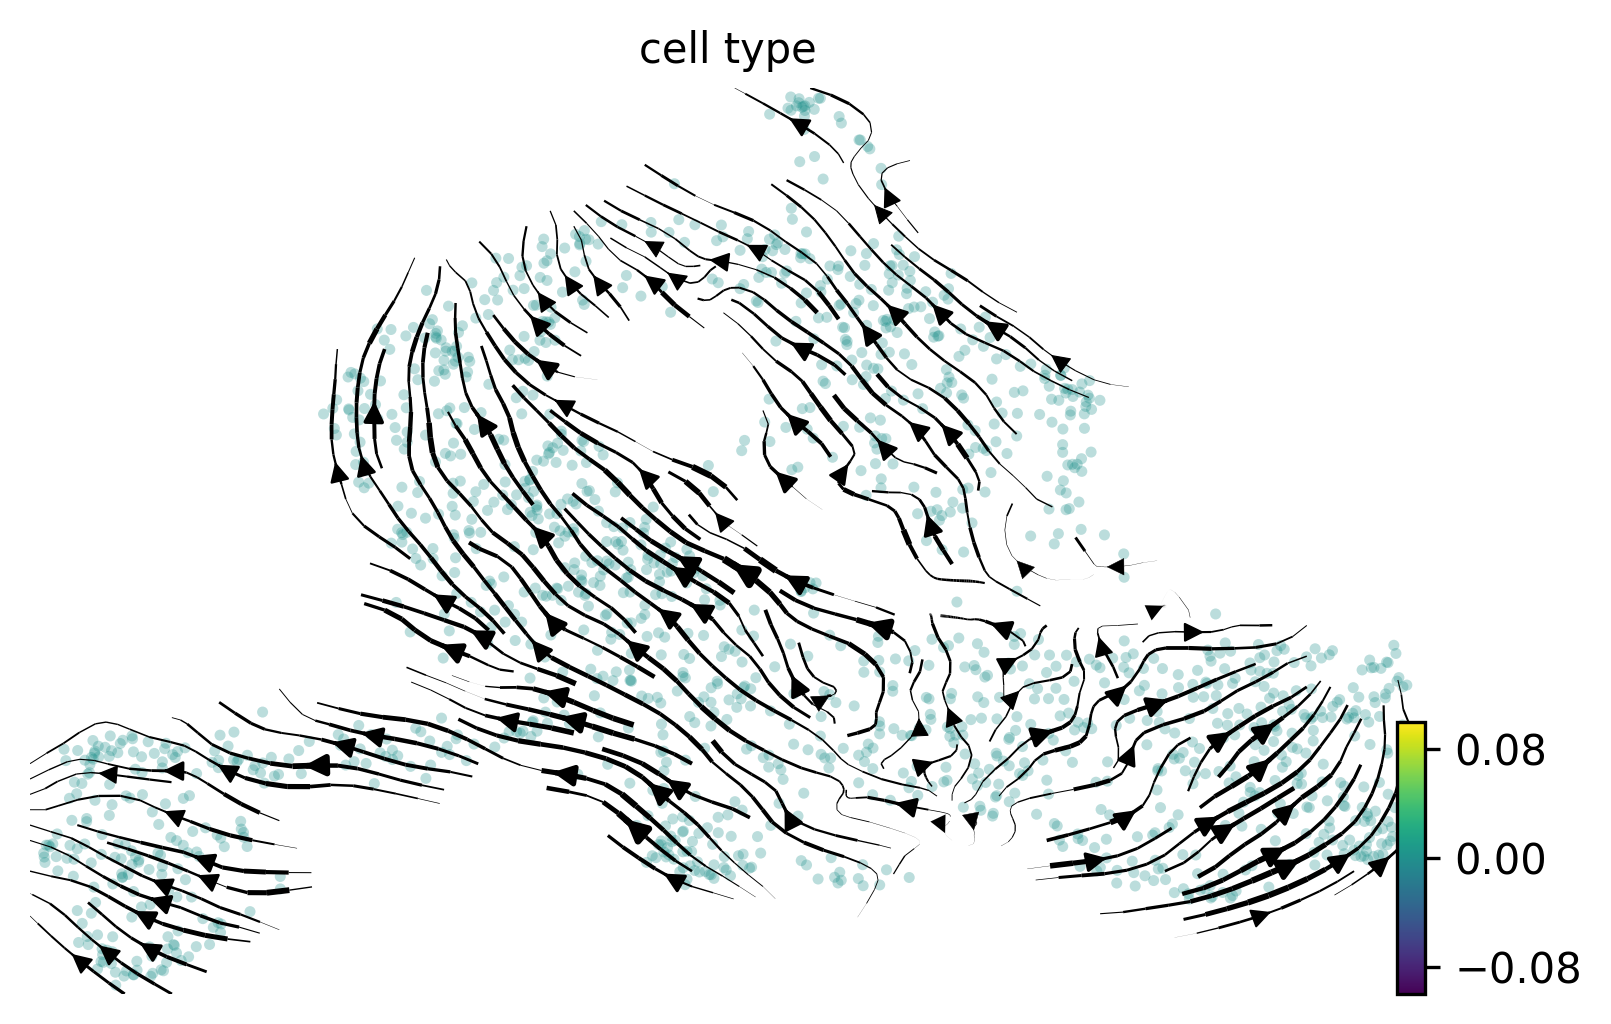

In [7]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


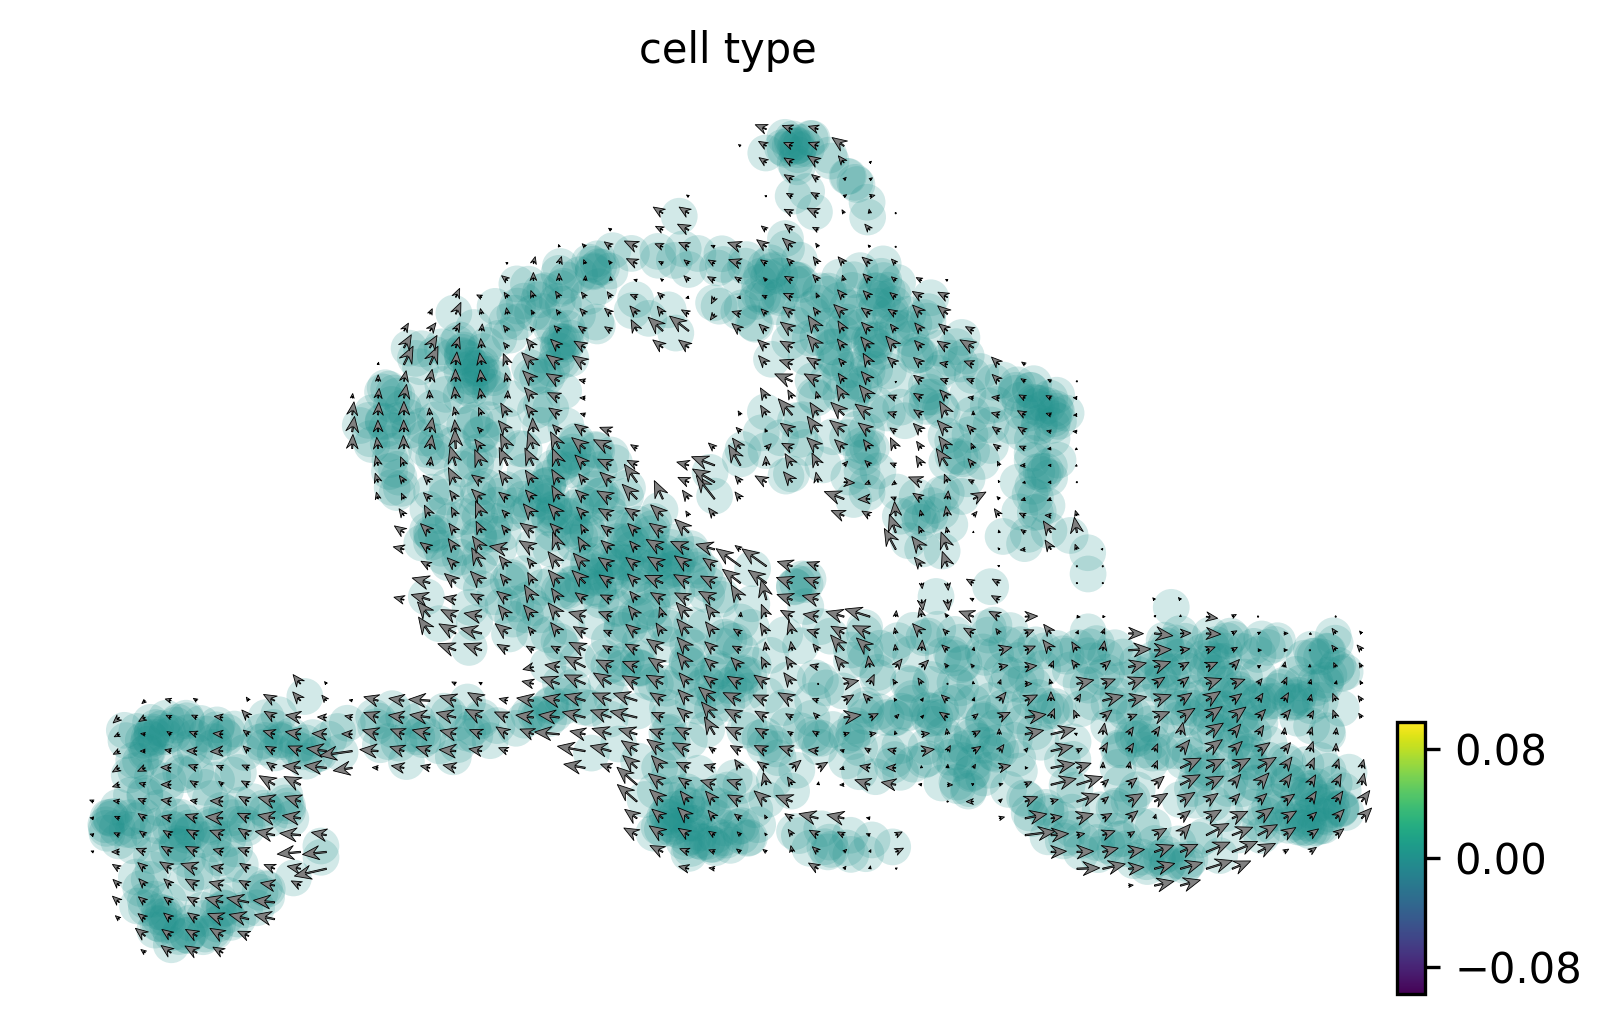

In [8]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


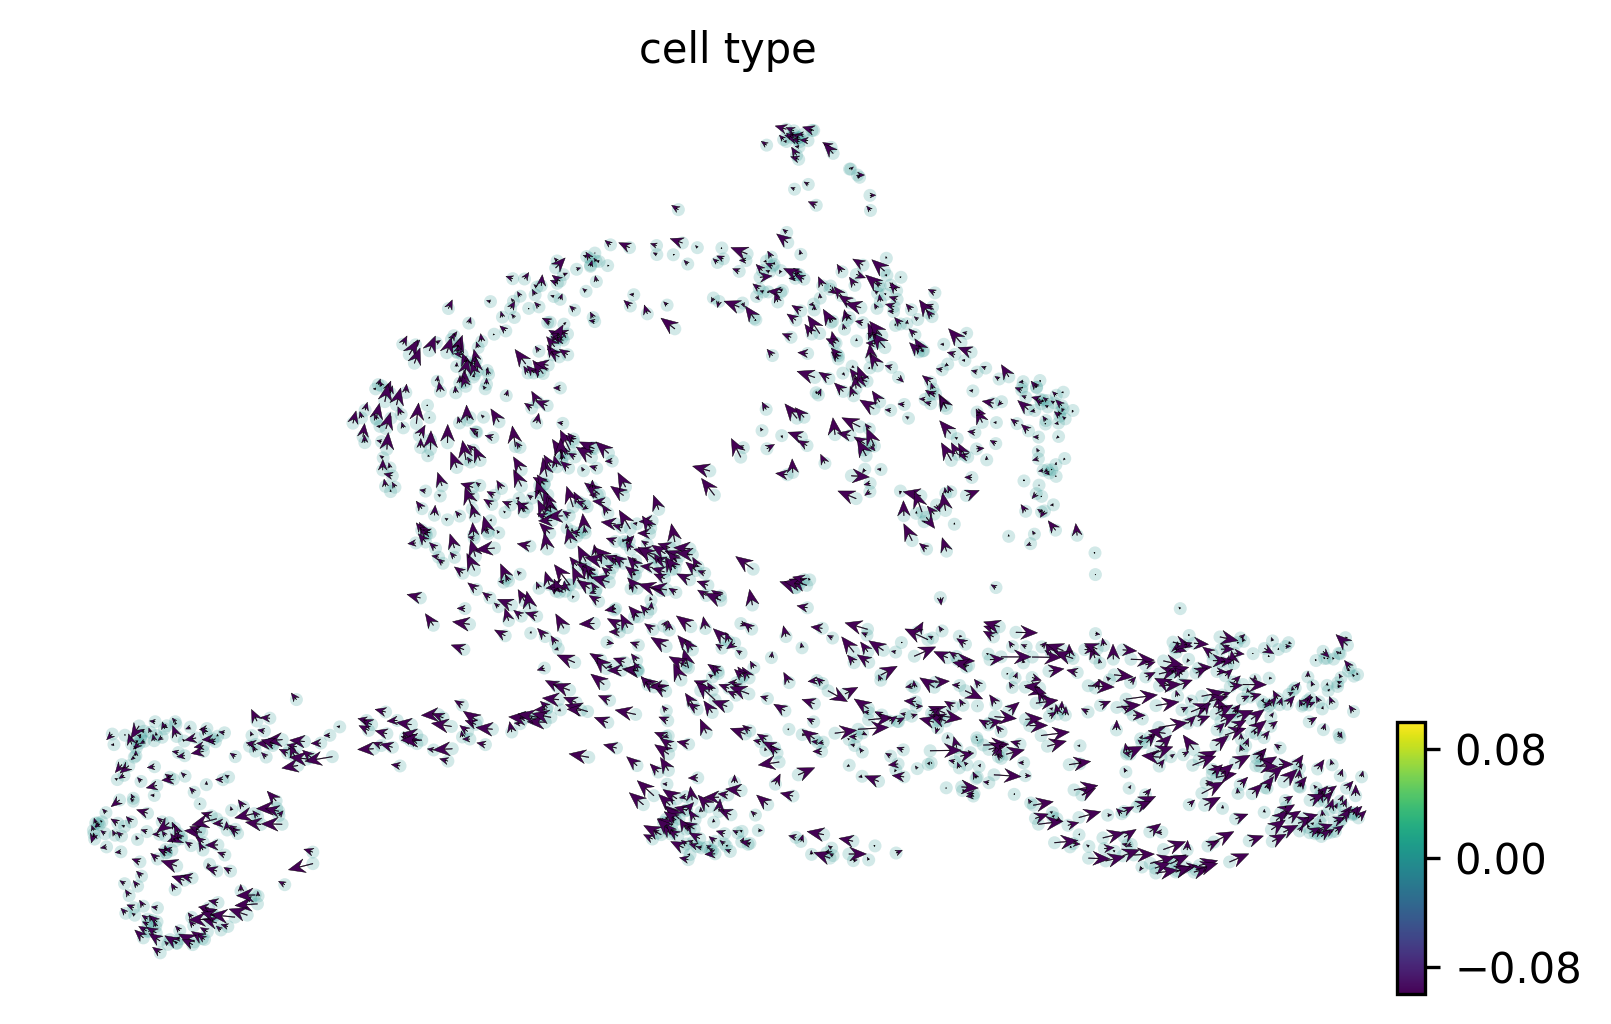

In [9]:
scv.pl.velocity_embedding(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


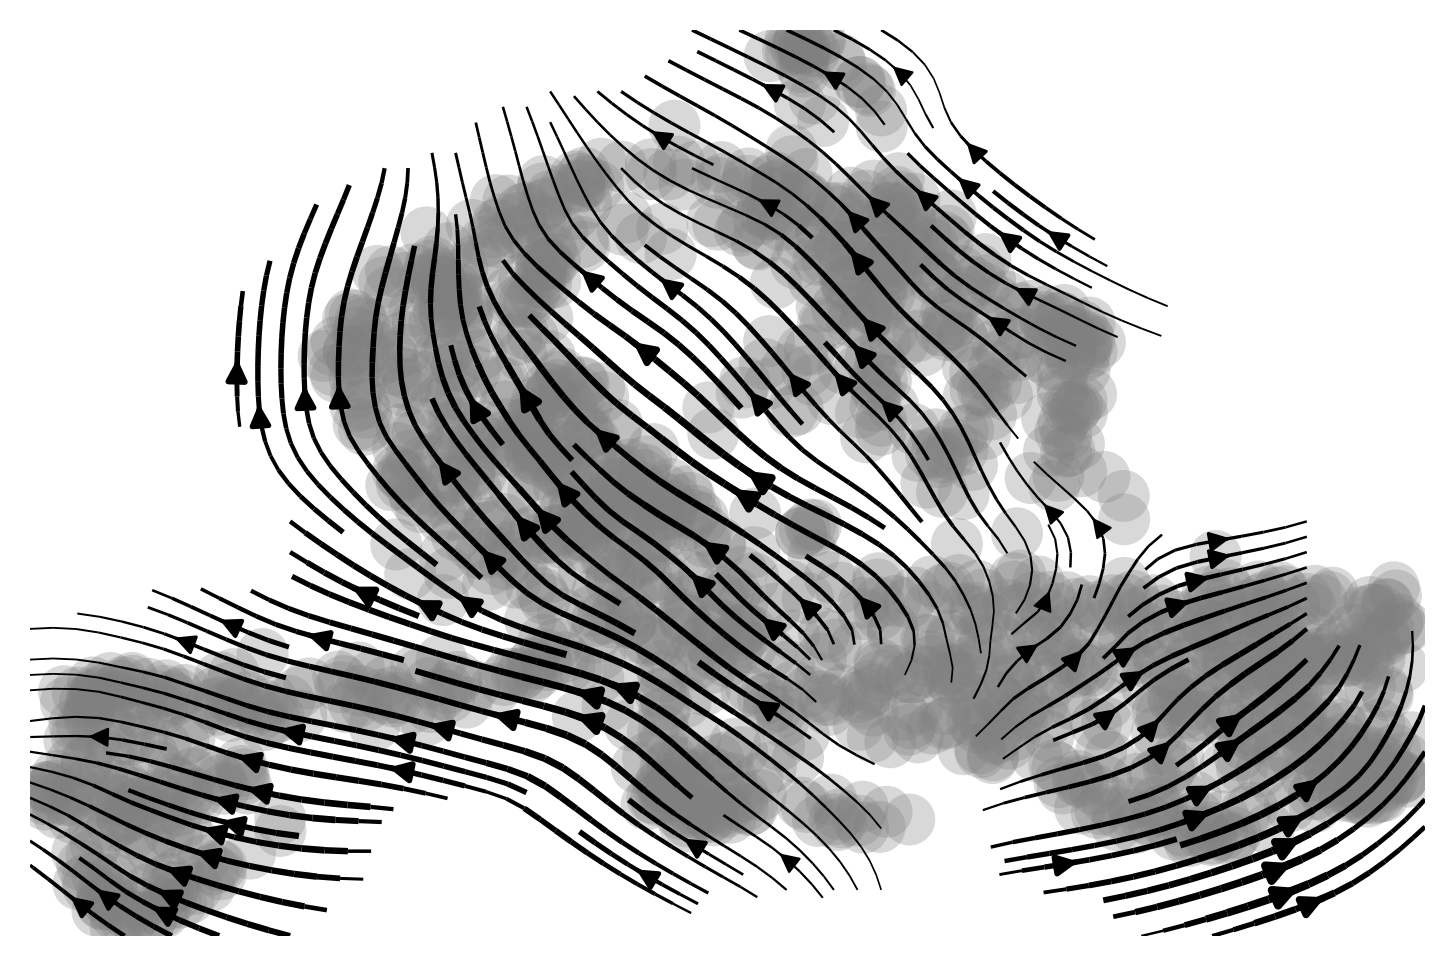

In [10]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=2, min_mass=4, dpi=300
)

### Velocity graph and pseudotime


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


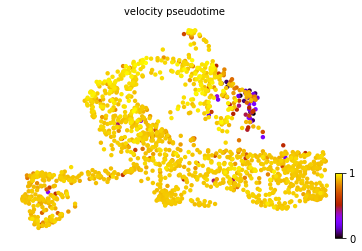

In [11]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

### phase portraits of some marker genes

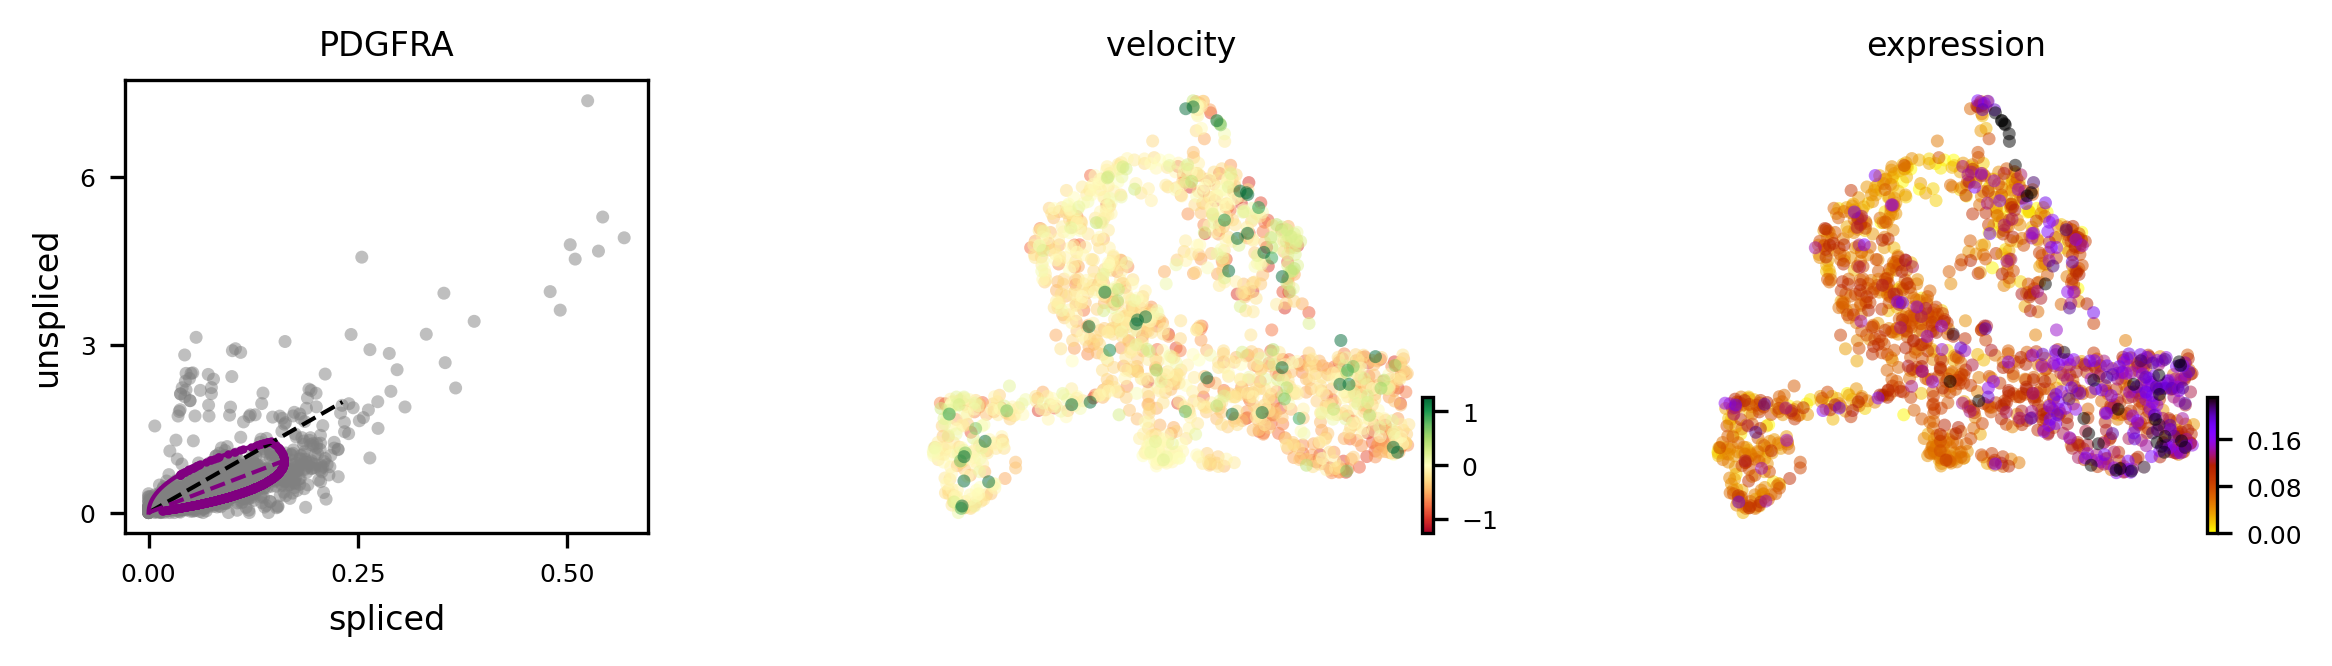

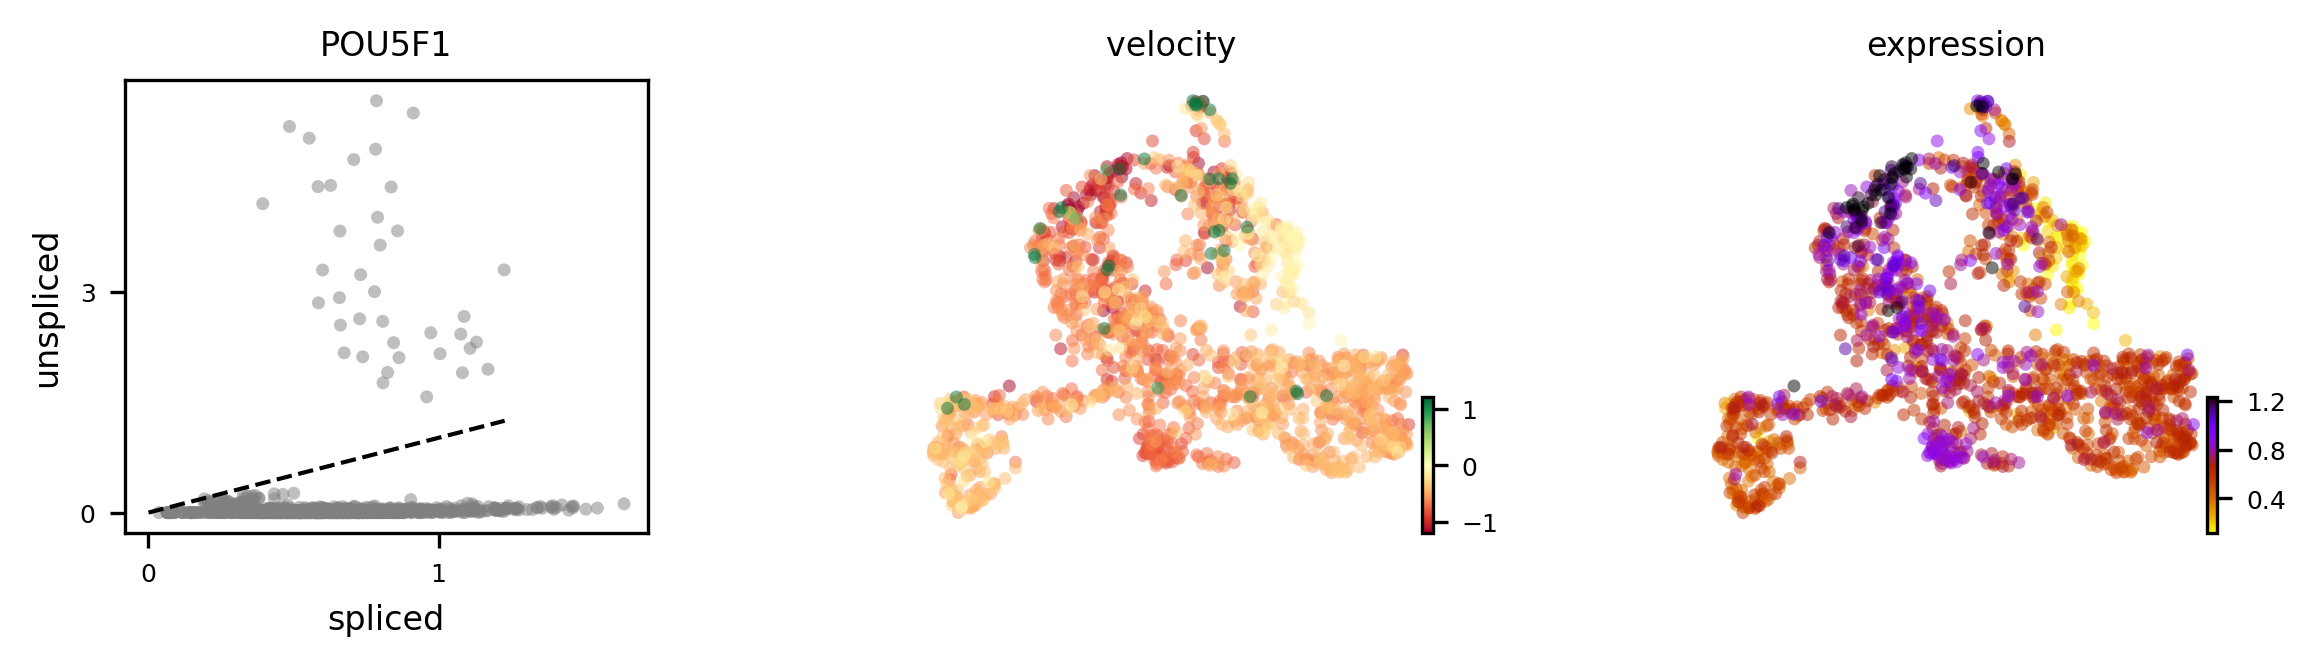

In [12]:
scv.pl.velocity(adata, ['PDGFRA'], ncols=1, dpi=300)
scv.pl.velocity(adata, ['POU5F1'], ncols=1, dpi=300)

### Important genes from velocity

In [13]:
scv.tl.rank_velocity_genes(adata, groupby='seurat_clusters', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(30)

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0         1         2         3           4        5         6  \
0   AC105383.1     GRIA1      TLE4  LHX5-AS1         GLS    KCNH5     CDCA2   
1        PRKCA   ARHGEF4     EPHA7    TFAP2B  AC105383.1    RSPO2    HAPLN1   
2      COL23A1     ILDR2   ZNF385B    MALAT1       PRKCA   SCUBE2    TFAP2B   
3         CLMN   ZNF385B     RSPO2    HAPLN1        CLMN    ANOS1      PLAU   
4        GRID2      SHC3    CEP112     KCNH5       SLIT3     ELP4   PHACTR2   
5          GLS    CEP112    MAPK10      LMO4     COL23A1  ZNF804B      BUB1   
6        TRIM9    MAPK10     GRIA1   ZNF804B        ASPM    EPCAM     NR2F1   
7         SOX5   RAPGEF5    TFAP2B     NR2F1        TNS3   TFAP2B     KIF11   
8       SPRED1   COL11A1      ELP4     ESRP1       GRID2    ESRP1  LHX5-AS1   
9         TNS3    TFAP2B    SCUBE2     EPCAM    SLC25A24    NRIP3      BDNF   
10        TLE1     PAPPA     USP53    LYPD6B        SOX5    EPHA7    SFMBT2   
11       PCDH7  ANKRD33B     NRIP3       BOC       TRIM9   HAPLN1      ETS1   
12      PCDH10     NR2C1     FGFR2     ZFHX4        CCNF  CYP26C1      VCAN   
13      SFMBT2      CDON     KCNH5   CYP26C1      MALAT1     WNT4   PPFIBP1   
14        TFPI     LRIG1     ANOS1      XIST       PCDH7    NR2F1      LMO4   
15     C1orf21      FBN2     SLIT3      P3H2      SPRED1     FBN2      OTX2   
16       SLIT3     PRKCA     NR2C1     PAPPA     PHACTR2    VAT1L      TFPI   
17        VCAN    SAMD4A  ANKRD34B     CGNL1    HOTAIRM1    USP53      GAD2   
18    LHX5-AS1    HAPLN1      WNT4      VCAN       KIF11     ETS1  SLC25A24   
19        ASPM    GREB1L  HOTAIRM1      WNT4      SFMBT2   GREB1L     CKAP5   
20      KIF18A      TFPI     ILDR2     ANOS1        OTX2      BOC    SCUBE2   
21      PTPN13  LHX5-AS1      LMO4     MACF1     RANGAP1   LYPD6B     ZFHX4   
22     PHACTR2     NR2F1   C1orf21     RSPO2       ESRP1    PAPPA     EPCAM   
23      CNKSR3      TLE4    SAMD4A    PDGFRA    ANKRD34B     LMO4     TRIM9   
24       LRIG1    PDGFRA      ASPM      PLAU        TLE1     SOX5      NDE1   
25     CYP26C1    PTPN13   RANGAP1      TFPI       CKAP5  RAPGEF5       GLS   
26     PPFIBP1    ERICH1     ESRP1     USP53        BUB1    MACF1     LAMA1   
27       KIF11     MACF1      ETS1    KIF18A    ANKRD33B    LAMA1      XIST   
28    SLC25A24      TLE1    GREB1L  HOTAIRM1      CNKSR3     TLE4    MALAT1   
29       CENPE      P3H2      GAD2    PTPN13     COL11A1     GAD2     USP53   

           7         8           9  
0       TLE4      NDE1         GLS  
1      EPHA7    CNKSR3     COL23A1  
2      SLIT3    KIF18A        NDE1  
3      ILDR2  ANKRD34B      SPRED1  
4      GRIA1     FGFR2       PRKCA  
5   ANKRD34B      TNS3        CLMN  
6      FGFR2      CCNF       GRID2  
7     MAPK10    MALAT1  AC105383.1  
8    C1orf21     MACF1        SOX5  
9      USP53     USP53      MALAT1  
10     NR2C1    GREB1L        CCNF  
11      TLE1      TLE1        XIST  
12     MACF1    PCDH10     PPFIBP1  
13     PCDH7     CENPE      PCDH10  
14   PHACTR2     CKAP5     RANGAP1  
15   ZNF385B      SOX5        ASPM  
16  ANKRD33B     PCDH7        GAD2  
17      TNS3    SFMBT2        TFPI  
18       BOC     LAMA1       LRIG1  
19     GRID2    SPRED1       NRIP3  
20    CEP112     NRIP3    LHX5-AS1  
21    CNKSR3   CYP26C1       TRIM9  
22     CENPE   RANGAP1     CYP26C1  
23      CCNF      FBN2        CDON  
24     CKAP5      TLE4      CEP112  
25      SHC3      CDON       PCDH7  
26      ASPM    SAMD4A     COL11A1  
27    GREB1L     ILDR2      SFMBT2  
28    SAMD4A      GAD2      KIF18A  
29  HOTAIRM1    PTPN13        OTX2

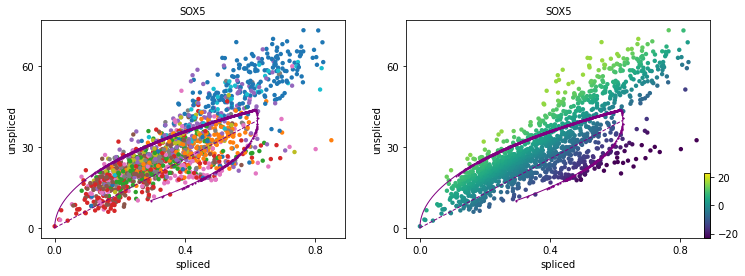

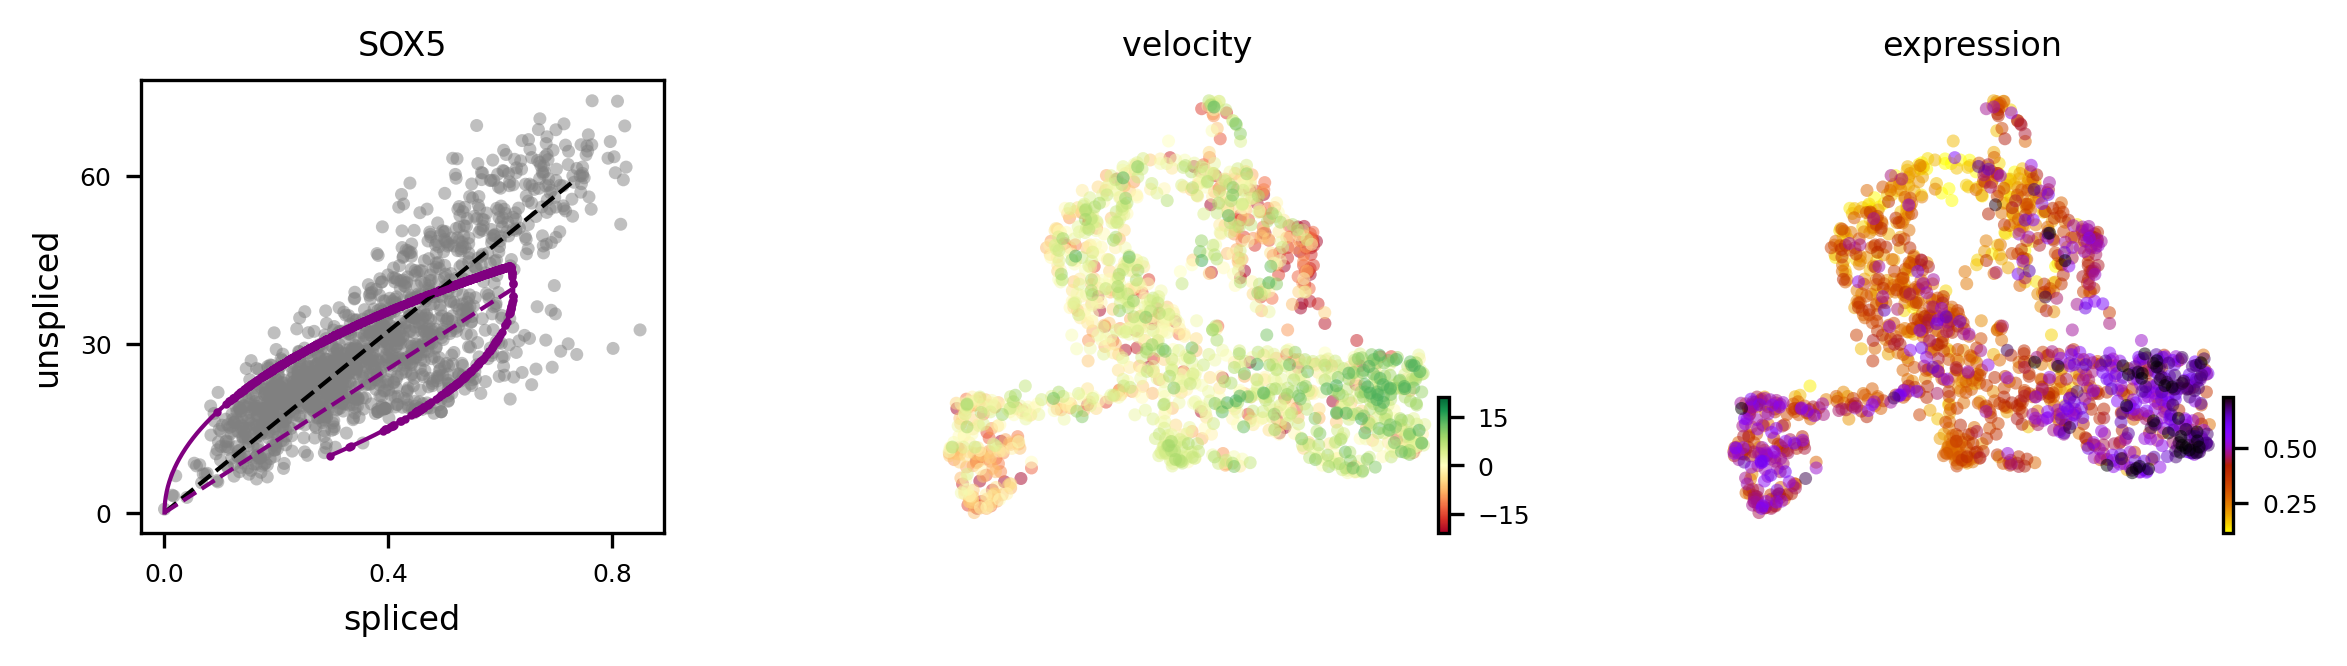

In [14]:
scv.pl.scatter(adata, 'SOX5', color=['seurat_clusters', 'velocity'])
scv.pl.velocity(adata, ['SOX5'], ncols=1, dpi=300)

### Speed and coherence



--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


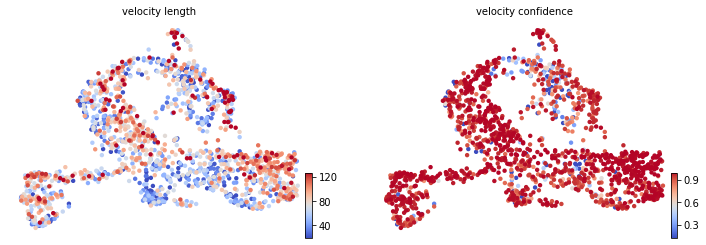

In [15]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

## CellRank

In [16]:
k = cr.tl.transition_matrix(
    adata, weight_connectivities=0.2, softmax_scale=4, show_progress_bar=False
)
cr.tl.terminal_states(adata, cluster_key="seurat_clusters", weight_connectivities=0.2)

### Terminal state

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


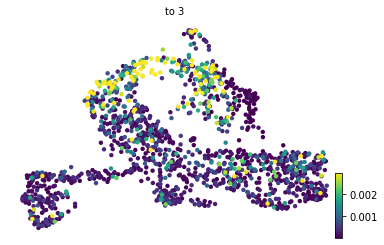

In [17]:
cr.pl.terminal_states(adata)


### Initial state

  0%|          | 0/1542 [00:00<?, ?cell/s]

  0%|          | 0/1542 [00:00<?, ?cell/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


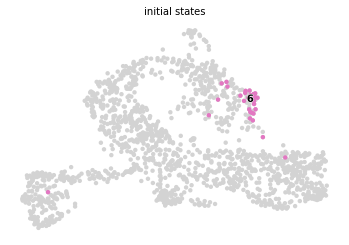

In [18]:
cr.tl.initial_states(adata, cluster_key="seurat_clusters")
cr.pl.initial_states(adata, discrete=True)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


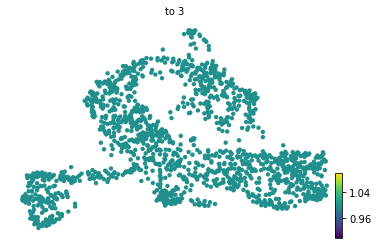

In [19]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


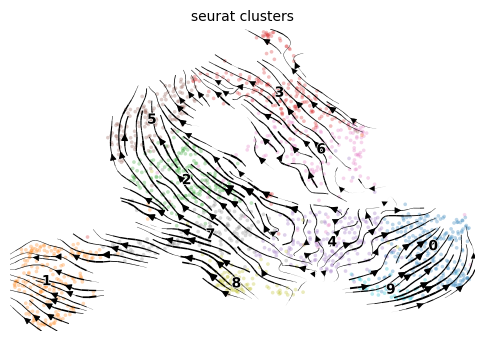

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


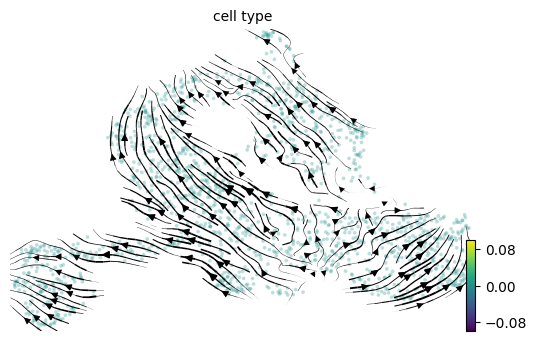

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


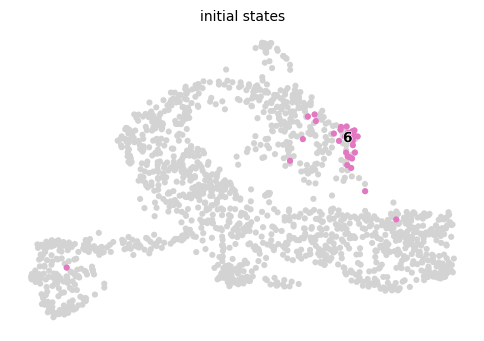

In [20]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=28, dpi=100)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=100)
cr.pl.initial_states(adata, discrete=True, dpi=100)